In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import sqlite3
import csv
import numpy as np

In [98]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1 = df1.rename(columns = {'title':'movie'})

In [38]:
df2 = pd.read_csv('imdb.name.basics.csv.gz')
con2 = sqlite3.connect('imdb.name.basics.csv.gz')

In [89]:
df3 = pd.read_csv('imdb.title.akas.csv.gz')
con3 = sqlite3.connect('imdb.title.akas.csv.gz')
df3 = df3.rename(columns = {'title_id':'tconst'})
df3 = df3.rename(columns = {'title':'movie'})

In [40]:
df4 = pd.read_csv('imdb.title.basics.csv.gz')
con4 = sqlite3.connect('imdb.title.basics.csv.gz')

In [41]:
df5 = pd.read_csv('imdb.title.crew.csv.gz')

In [42]:
df6 = pd.read_csv('imdb.title.principals.csv.gz')

In [43]:
df7 = pd.read_csv('imdb.title.ratings.csv.gz')
con7 = sqlite3.connect('imdb.title.ratings.csv.gz')

In [44]:
df8 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
con8 = sqlite3.connect('rt.movie_info.tsv.gz')
df8 = df8.set_index('id')
df8 = df8.sort_values(by='box_office', ascending=False)

In [10]:
df9 = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='windows-1254')
con9 = sqlite3.connect('rt.reviews.tsv.gz')
df9 = df9.set_index('id')

In [11]:
df10 = pd.read_csv('tmdb.movies.csv.gz')
con10 = sqlite3.connect('tmdb.movies.csv.gz')
df10 = df10.set_index(['Unnamed: 0'])

In [64]:
df11 = pd.read_csv('tn.movie_budgets.csv.gz')
con11 = sqlite3.connect('tn.movie_budgets.csv.gz')
df11['worldwide_gross'] = df11['worldwide_gross'].str[1:]
df11['worldwide_gross'] = df11['worldwide_gross'].str.replace(',', '').astype(np.int64)
df11['domestic_gross'] = df11['domestic_gross'].str[1:]
df11['domestic_gross'] = df11['domestic_gross'].str.replace(',', '').astype(np.int64)
df11['production_budget'] = df11['production_budget'].str[1:]
df11['production_budget'] = df11['production_budget'].str.replace(',', '').astype(np.int64)


In [99]:
BigFrame = pd.concat([df1, df3, df4, df7, df8, df9, df10, df11])
BigFrame.keys()

Index(['movie', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'tconst',
       'ordering', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'synopsis',
       'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date',
       'currency', 'box_office', 'runtime', 'review', 'fresh', 'critic',
       'top_critic', 'publisher', 'date', 'genre_ids', 'id',
       'original_language', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'production_budget', 'worldwide_gross'],
      dtype='object')

In [100]:
d = {'title': 'first', 'domestic_gross': 'sum', 'foreign_gross': 'sum', 'worldwide_gross': 'sum', 'primary_title': 'first', 'original_title': 'first', 'production_budget': 'first', 'region': 'first', 'genres': 'first', 'runtime_minutes': 'sum'}
NewFrame = BigFrame.groupby(BigFrame['movie']).aggregate(d)
NewFrame

TypeError: can only concatenate str (not "int") to str

In [96]:
print('DF1:', df1.columns, '\n')
print('DF3: ', df3.columns, '\n')
print('DF4: ', df4.columns, '\n')
print('DF7: ', df7.columns, '\n')
print('DF8: ', df8.columns, '\n')
print('DF9: ', df9.columns, '\n')
print('DF10: ', df10.columns, '\n')
print('DF11: ', df11.columns, '\n')

DF1: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object') 

DF3:  Index(['tconst', 'ordering', 'movie', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object') 

DF4:  Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object') 

DF7:  Index(['tconst', 'averagerating', 'numvotes'], dtype='object') 

DF8:  Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object') 

DF9:  Index(['review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object') 

DF10:  Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object') 

DF11:  Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worl

In [16]:
df1.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
df3.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [18]:
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
df7.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
df8.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN


In [21]:
df9.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [22]:
df10.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
Unnamed: 0,,,,,,,,,
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
df11.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [24]:
df1drop = df1.dropna()
df2drop = df2.dropna()
df3drop = df3.dropna()
df4drop = df4.dropna()
df5drop = df5.dropna()
df6drop = df6.dropna()
df7drop = df7.dropna()
df8drop = df8.dropna()
df9drop = df9.dropna()
df10drop = df10.dropna()
df11drop = df11.dropna()


In [32]:
print(df1.keys())
print(df3.keys())

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')


In [66]:
join1 = '''
SELECT title, domestic_gross, foreign_gross, year, region
FROM df1 d
JOIN df3 f
'''
pd.read_csv(join1, con1)

TypeError: object of type 'sqlite3.Connection' has no len()

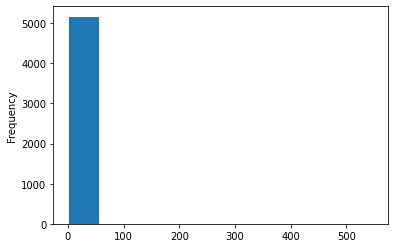